# Entrenamiento de una red neuronal para la prediccion de una plnata de segundo orden

<div style="text-align: justify">
El objetivo es crear un modelo de basado en una red neuronal que sea capaz de replicar el comportamiento de una planta de segundo orden.
La intención es que encuentre una correlación entre dos datos de entrada, distintas entradas a la planta y el tiempo; con respecto a la salida de la planta original.

In [2]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


seed = 7
np.random.seed(seed)

# Cargar el dataset de planta.csv
dataset = np.loadtxt("planta.csv",delimiter=",")

In [3]:
dataset.shape

(10, 100)

In [4]:
tiempo = [i for i in range(0,100)]
x = np.array(tiempo)
y = dataset[1,:]

In [5]:
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))

In [6]:
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())

0.0 1.0 0.0 1.0


In [26]:
model = Sequential()
model.add(Dense(100, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(35, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid',kernel_initializer='uniform'))

In [27]:
model.compile(loss = 'mse', optimizer='adam')

In [28]:
model.fit(x, y, epochs=1000, batch_size=50, verbose=0)

In [29]:
y_p = model.predict(x)

In [30]:
# Se reinvierte la escala
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
y_p_plot = scale_y.inverse_transform(y_p)

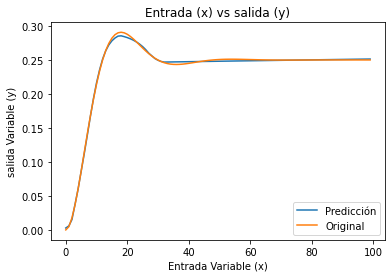

In [31]:
# plot x vs yhat

plt.plot(x_plot,y_p_plot, label='Predicción')


plt.plot(x_plot,y_plot, label='Original')
plt.title('Entrada (x) vs salida (y)')
plt.xlabel('Entrada Variable (x)')
plt.ylabel('salida Variable (y)')

plt.legend()
plt.show()

Como vemos solo hemos logrado que la red neuronal aprenda el comportamiento de la plata solo con una entrada, el objetivo que buscamos es que sea una red neuronal  capaz de predecir el comportamiento de la planta con distintas entradas, por lo tanto, también hay que tomar en cuenta las diez entradas calculadas en el data set y después probar que la red sea capaz de predecir el comportamiento de la entra con cualquier entrada.
Es decir que la red neuronal en lugar de predecir una funcion en 2D sea capaz de recrear una superficie 3D como la vista en el cuaderno "Planta_Data_base"